In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from sort import *

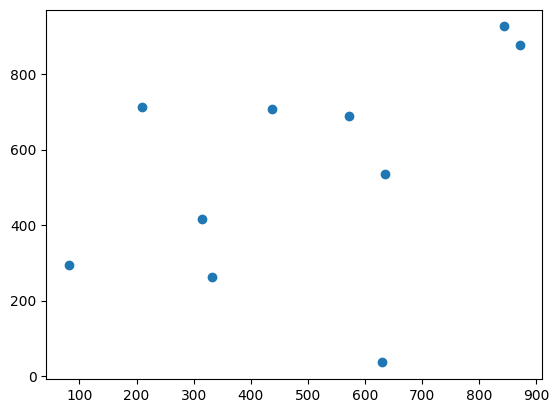

graham_scan with DHeap= 0.0
graham_scan with Kmerge= 0.0009980201721191406
point 1: 630, 36
point 2: 871, 876
point 3: 844, 926
point 4: 210, 714
point 5: 81, 293


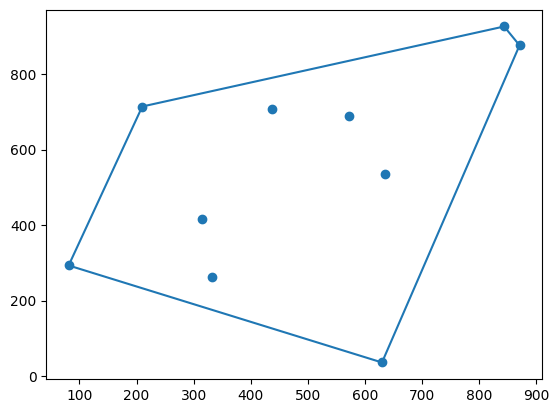

In [8]:

points = []
xcoords = []
ycoords = []

class point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.polar = 0
        self.distance = 0

def find_p0(points):
    
    min_y = float("inf")
    min_index = 0
    for i, point in enumerate(points):
        if point.y < min_y:
            min_y = point.y
            min_index = i
        if point.y == min_y:
            if point.x < points[min_index].x:
                min_index = i
    return points[min_index], min_index

def read_points_from_file(filename):
    with open(filename, 'r') as file:
        for line in file:
            x, y = map(int, line.split())
            point.x = x
            point.y = y
            xcoords.append(point.x)
            ycoords.append(point.y)
            points.append(point(point.x, point.y))
    plt.scatter(xcoords, ycoords)
    plt.show()
    
def save_points_to_file(filename, points):
    with open(filename, 'w') as file:
        for x, y in points:
            file.write(f"{x} {y}\n")    

def scatter(n, q, w):
    for i in range(0, n):
        point.x = np.random.randint(0, q)
        point.y = np.random.randint(0, w)
        xcoords.append(point.x)
        ycoords.append(point.y)
        points.append(point(point.x, point.y))
    plt.scatter(xcoords, ycoords)
    plt.show()

def generate_random_point_on_rectangle(n, q, w):
    for i in range(0, n):
        side = np.random.choice(['top', 'bottom', 'left', 'right']) 
        if side == 'top':
            point.x = np.random.randint(0, q) 
            point.y = w  
        elif side == 'bottom':
            point.x = np.random.randint(0, q)
            point.y = 0 
        elif side == 'left':
            point.x = 0 
            point.y = np.random.randint(0, w)
        else:
            point.x = q  
            point.y = np.random.randint(0, w) 
        xcoords.append(point.x)
        ycoords.append(point.y)
        points.append(point(point.x, point.y))
    plt.scatter(xcoords, ycoords)
    plt.show()

def polar_angle(p0, p1):
    y_span = p1.y - p0.y
    x_span = p1.x - p0.x
    return math.atan2(y_span, x_span)

def distance(p0, p1):
    return math.sqrt((p1.x - p0.x)**2 + (p1.y - p0.y)**2)

def calc_angle(p1, p2, p3):
    return ((p2.x - p1.x)*(p3.y - p1.y) - (p2.y - p1.y)*(p3.x - p1.x))

def graham_scan(points, sort):
    p0, index = find_p0(points)
    points[0], points[index] = points[index], points[0]
    for i in range(1, len(points)):
        pa = polar_angle(p0, points[i])
        d = distance(p0, points[i])
        points[i].polar = pa
        points[i].distance = d

    if sort == "DHeap":
        heap_sort(points, 3)
    elif sort == "KMerge":
        #k_merge_sort(points, 5)
        points = k_merge_sort(points, 5)
    
    remove = []
    for i in range(1, len(points) - 1):
        if calc_angle(points[i], points[i+1], p0) < 0:
            remove.append(i)
    points = [i for j, i in enumerate(points) if j not in remove]
    # points = [i for j, i in enumerate(points)]
    if len(points) == 1:
        p1 = points[0]
        stack = []
        stack.append(p0)

    elif len(points) == 2:
        p1 = points[1]
        stack = []
        stack.append(p0)
        stack.append(p1)

    else:
        p1 = points[1]
        p2 = points[2]
        stack = []
        stack.append(p0)
        stack.append(p1) 
        stack.append(p2)  
        for i in range(3, len(points)):
            while len(stack) > 1 and calc_angle(stack[-2], stack[-1], points[i]) < 0:
                stack.pop()
            stack.append(points[i])
    return stack

def __main__():
    # n = int(input("Enter number of points: "))
    # q = int(input("Длина:"))
    # w = int(input("Ширина:"))
    scatter(10, 1000, 1000)
    #generate_random_point_on_rectangle(10, 100, 100)
    #read_points_from_file("points.txt")
    start = time.time()
    ans = graham_scan(points, "DHeap")
    end = time.time()
    # dheap_points = [(point.x, point.y) for point in ans]
    # save_points_to_file("Graham_with_DHeap.txt", dheap_points)
    print(f'graham_scan with DHeap= {end - start}')
    
   
    start = time.time()
    ans = graham_scan(points, "KMerge")
    end = time.time()
    # Kmerge_points = [(point.x, point.y) for point in ans]
    # save_points_to_file("Graham_with_KMerge.txt", Kmerge_points)
    print(f'graham_scan with Kmerge= {end - start}')

    axc = []
    ayc = []
    for i, obj in enumerate(ans):
        print("point %d: %d, %d" % (i+1, obj.x, obj.y))
        axc.append(obj.x)
        ayc.append(obj.y)
    axc.append(axc[0])
    ayc.append(ayc[0])
    plt.scatter(xcoords, ycoords)
    plt.plot(axc, ayc)
    plt.show()

__main__()

Cчитывание данных из файла.

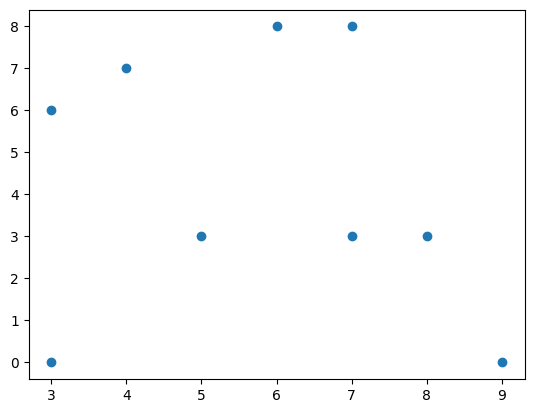

In [3]:
points = []
xcoords = []
ycoords = []
def read_points_from_file(filename):
    with open(filename, 'r') as file:
        for line in file:
            x, y = map(int, line.split())
            point.x = x
            point.y = y
            xcoords.append(point.x)
            ycoords.append(point.y)
            points.append(point(point.x, point.y))
    plt.scatter(xcoords, ycoords)
    plt.show()
    
def save_points_to_file(filename, points):
    with open(filename, 'w') as file:
        for x, y in points:
            file.write(f"{x} {y}\n")  
read_points_from_file("points.txt")  

Генерация рандомных точек в прямоугольнике.

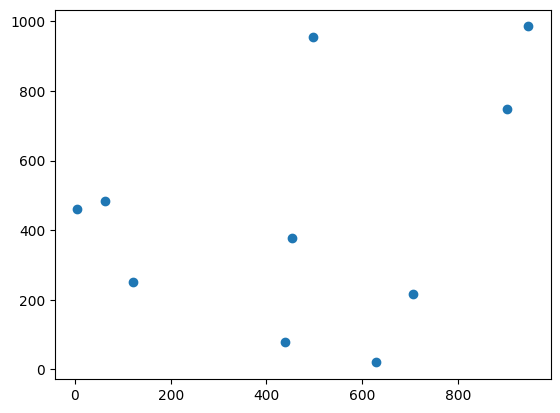

In [4]:
points = []
xcoords = []
ycoords = []
def scatter(n, q, w):
    for i in range(0, n):
        point.x = np.random.randint(0, q)
        point.y = np.random.randint(0, w)
        xcoords.append(point.x)
        ycoords.append(point.y)
        points.append(point(point.x, point.y))
    
    plt.scatter(xcoords, ycoords)
    plt.show()
scatter(10,1000,1000)

Генерация рандомных точек на стронах прямоугольника.

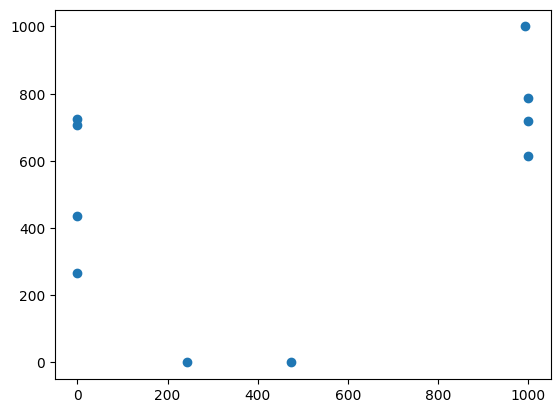

In [5]:
points = []
xcoords = []
ycoords = []
def generate_random_point_on_rectangle(n, q, w):
    for i in range(0, n):
        side = np.random.choice(['top', 'bottom', 'left', 'right']) 
        if side == 'top':
            point.x = np.random.randint(0, q) 
            point.y = w  
        elif side == 'bottom':
            point.x = np.random.randint(0, q)
            point.y = 0 
        elif side == 'left':
            point.x = 0 
            point.y = np.random.randint(0, w)
        else:
            point.x = q  
            point.y = np.random.randint(0, w) 
        xcoords.append(point.x)
        ycoords.append(point.y)
        points.append(point(point.x, point.y))
    plt.scatter(xcoords, ycoords)
    plt.show()
generate_random_point_on_rectangle(10,1000,1000)